## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Importing networks



In [1]:
import os
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

-----
## Import network and compute skim for a city
Here we download city graph, compute the skims and save to graphml and csvs
for future use in ExMAS

It:
* loads data for `params.city` 
* computes the skim, 
* saves the files into `params.paths.skim` and `params.paths.G`

#### Download single city and save skims

In [3]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json')

In [4]:
params.city = 'Wieliczka, Poland'
params = ExMAS.utils.make_paths(params) #update file paths

In [5]:
from ExMAS.utils import inData as inData

In [6]:
inData = ExMAS.utils.download_G(inData, params) # download the graph and compute the skim

In [7]:
ExMAS.utils.save_G(inData, params) # save it to params.paths.G

----

#### Some osmnx tutorial
we import graphs with `osmnx` 

for different cities, change the string

--- 
### 1. Import driveable network for `Delft`

In [8]:
#small imports
import sys
import random
import time
import pprint
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [16, 16]

In [9]:
#big imports
import osmnx as ox #OSM download and parse
import pandas as pd 
import networkx as nx #graphs

In [10]:
G = ox.graph_from_place('Delft, Netherlands', network_type='drive')

### 2. Plot it

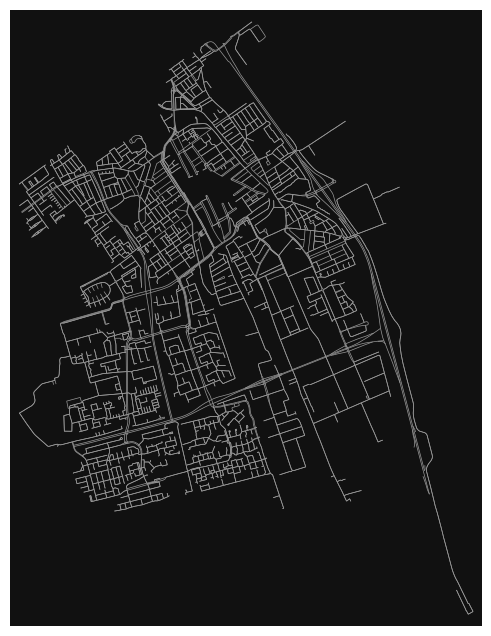

In [11]:
_ = ox.plot_graph(G,node_size=0, edge_linewidth=0.5)

#### * Network stats

In [12]:
pprint.pprint(ox.basic_stats(G))

{'circuity_avg': 1.0712159196850688,
 'edge_length_avg': 85.99301503892424,
 'edge_length_total': 486032.5209999998,
 'intersection_count': 1943,
 'k_avg': 4.696302451184047,
 'm': 5652,
 'n': 2407,
 'self_loop_proportion': 0.005089820359281437,
 'street_length_avg': 87.05292874251529,
 'street_length_total': 290756.78200000105,
 'street_segment_count': 3340,
 'streets_per_node_avg': 2.7627752388865807,
 'streets_per_node_counts': {0: 0, 1: 464, 2: 72, 3: 1467, 4: 381, 5: 21, 6: 2},
 'streets_per_node_proportions': {0: 0.0,
                                  1: 0.1927710843373494,
                                  2: 0.029912754466140425,
                                  3: 0.6094723722476111,
                                  4: 0.15828832571665974,
                                  5: 0.008724553385957623,
                                  6: 0.0008309098462816784}}


### 3. Graph data

In [15]:
G.get_edge_data(1501364225, 1402613311)

{0: {'osmid': 136852791,
  'oneway': True,
  'lanes': '1',
  'name': 'Brasserskade',
  'highway': 'unclassified',
  'maxspeed': '50',
  'reversed': False,
  'length': 15.082}}

#### DataFrame and .csv export

In [16]:
df = nx.to_pandas_edgelist(G)
df.to_csv('Delft.csv')
df.head()

,source,target,geometry,ref,highway,lanes,maxspeed,oneway,bridge,reversed,name,access,osmid,tunnel,length,width,junction
0,27082148,44839614,NaN,NaN,tertiary,2,50,False,NaN,False,Delfgauwseweg,NaN,48688450,NaN,141.011,NaN,NaN
1,27082148,44835830,"LINESTRING (4.3789686 52.0083967, 4.378898 52....",NaN,residential,NaN,30,False,NaN,True,Spiekmanstraat,NaN,7537370,NaN,39.821,NaN,NaN
2,27082148,44833192,"LINESTRING (4.3789686 52.0083967, 4.3797051 52...",NaN,tertiary,2,50,False,NaN,True,Delfgauwseweg,NaN,48688450,NaN,124.181,NaN,NaN
3,30016605,44739609,NaN,NaN,living_street,NaN,15,False,NaN,False,Geitenkamp,NaN,144919697,NaN,77.054,NaN,NaN
4,30016605,44736833,"LINESTRING (4.356041 51.9863615, 4.3564576 51....",NaN,living_street,NaN,15,False,NaN,False,Boerderijstraat,NaN,7539987,NaN,68.460,NaN,NaN


### 4. Graph searches 

In [17]:
node_list = list(G.nodes)
o = random.choice(node_list)
d = random.choice(node_list)

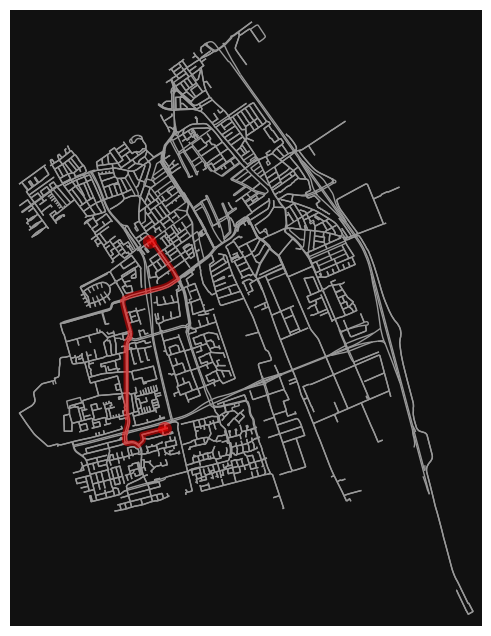

In [18]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, o, d, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [19]:
print("Shorthest path from node {} to node {} distance: {}m".format(o,d,nx.shortest_path_length(G, o, d, weight='length')))

Shorthest path from node 44824388 to node 1448535854 distance: 3549.841999999999m


### 5. Skim matrices

In [20]:
skim = dict(nx.all_pairs_dijkstra_path_length(G, weight = 'length')) # may take some time

In [23]:
o = random.choice(node_list)
#o = 1501364225
#d = 1402613311
d = random.choice(node_list)
print("From node {} to node {} distance: {}m".format(o,d,round(skim[o][d])))

From node 44713015 to node 5300707250 distance: 3592m


-------------
Rafal Kucharski, 2019, Delft, r.m.kucharski@tudelft.nl